## Basic mathematical statistics homework for Data Scientist



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Build a histogram of the distribution of each of the metrics in the dataset using the dataframe's `hist()` method. If necessary, add a logarithmic axis (parameter log).


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

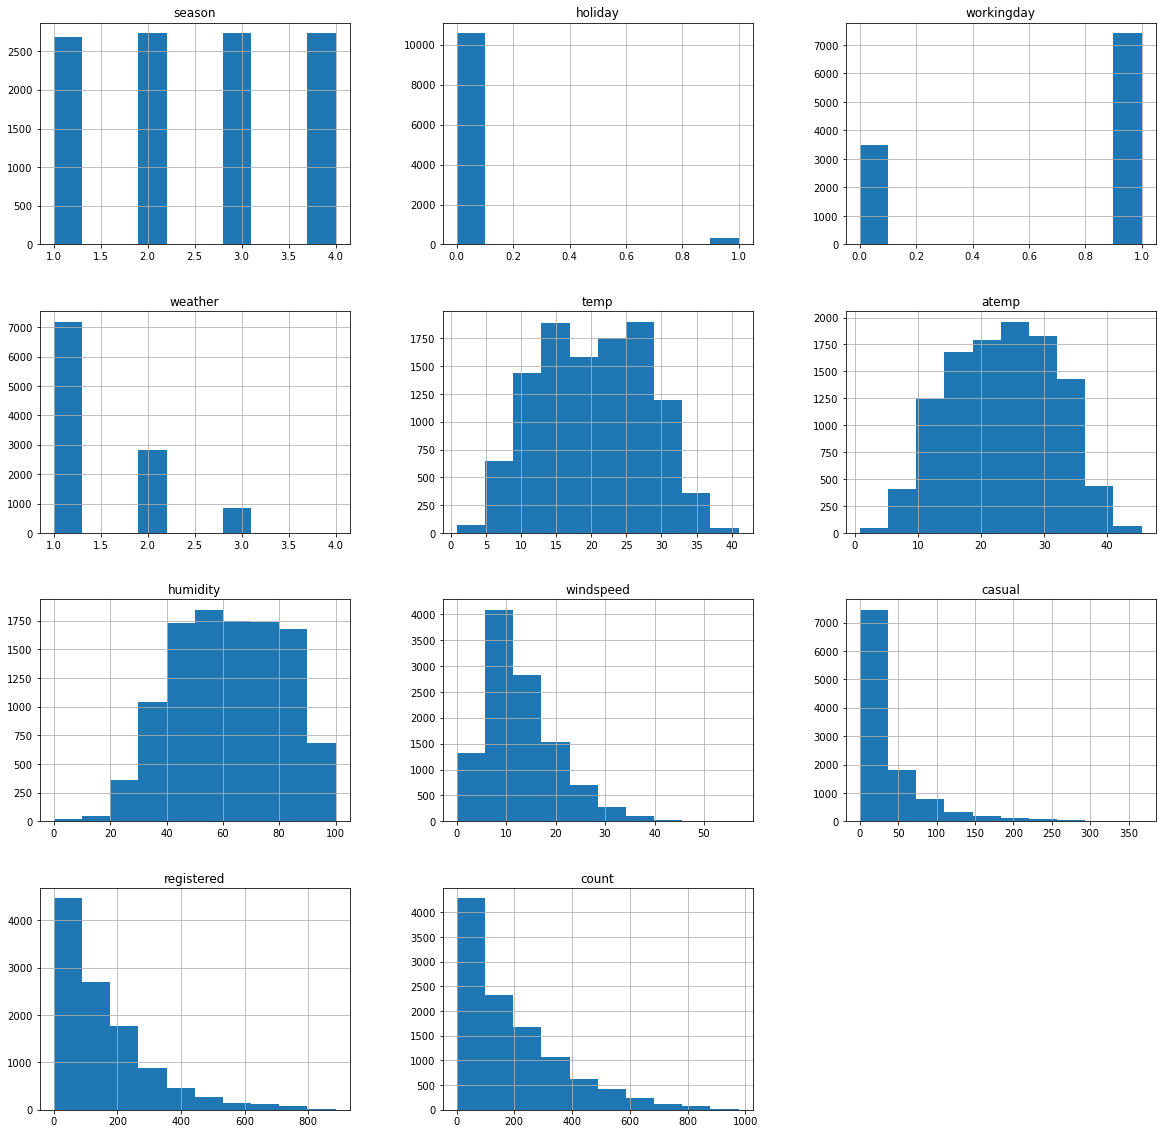

In [3]:
### YOUR CODE HERE ###

df.hist(figsize=(20,20))

### 2.
For each metric, find the mean, variance, 50th, 75th, and 99th percentiles, and mode.


In [4]:
### YOUR CODE HERE ###
print(df.mean(), '\n','\n',  df.var(), '\n','\n', np.percentile(df, 50), '\n','\n', np.percentile(df, 75), '\n','\n', np.percentile(df, 99)  )

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64 
 
 season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64 
 
 12.3 
 
 37.88 
 
 504.0


### 3. (*) 
For each metric, analyze the asymmetry and bias of the distribution - for this, calculate the coefficient of asymmetry and kurtosis for each metric.


In [5]:
### YOUR CODE HERE ###
kurtosis(df)


array([-1.35558995, 30.03262442, -1.39773698,  0.39480008, -0.91466138,
       -0.85023637, -0.76001971,  0.62929237,  7.54761013,  2.62432387,
        1.29894477])

In [6]:
skew(df)

array([-7.07469530e-03,  5.65973713e+00, -7.76056069e-01,  1.24331267e+00,
        3.69033584e-03, -1.02545381e-01, -8.63232869e-02,  5.88685396e-01,
        2.49540449e+00,  1.52459447e+00,  1.24189506e+00])

### 4.

Plot a symmetric confidence interval for the metric with the largest variance, given a confidence level of 0.95.


In [4]:
### YOUR CODE HERE ###
def my_norm_confidence(df=df, column='temp', alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df['temp'].mean(), scale=df['temp'].std())
    return interval


In [5]:
confidence = my_norm_confidence()
print(confidence)

(4.959624343428603, 35.502095296475744)


Text(0.5, 1.0, 'Confidence interval')

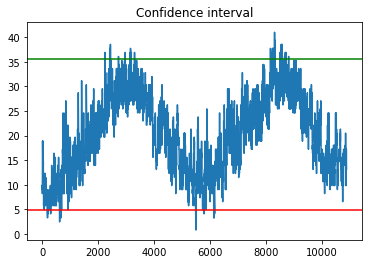

In [6]:
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

df.temp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Confidence interval")

### 5. (*)

Find the number of values outside three sigma for each of the metrics.


In [7]:
### YOUR CODE HERE ###

upper_level = df.atemp.mean() + 3*df.atemp.std()
lower_level = df.atemp.mean() - 3*df.atemp.std()
level_99 = np.percentile(df.atemp, 99)
print(lower_level,upper_level)


-1.7687178265427441 49.07888593236659


D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma and 99 quantile for normal distribution')

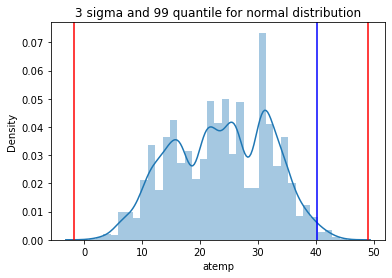

In [8]:
sns.distplot(df.atemp)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma and 99 quantile for normal distribution") 

In [15]:
df[df.atemp >= upper_level].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6.

Plot the correlation matrix and heatmap by metrics.


In [16]:
### YOUR CODE HERE ###
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
corr_m = df[col_list].corr()

corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

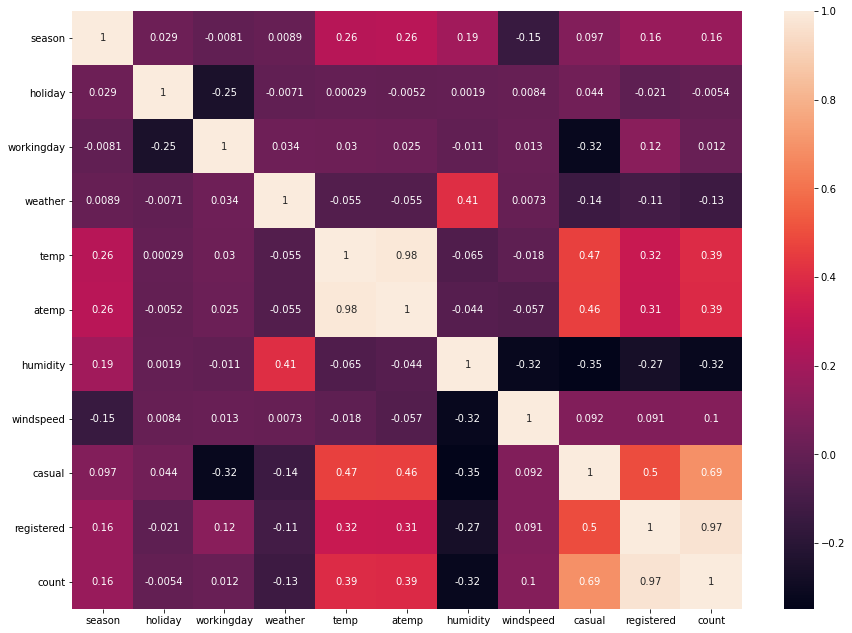

In [21]:
plt.figure(figsize=(15,11))
sns.heatmap(corr_m, annot=True)